In [44]:
import numpy as np # linear algebra
import pandas as pd
# data provessing, CSV file I/O(e.g.pd.read_csv)
from pandas import DataFrame

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
dataset=pd.read_csv("./bit_tweets_sentiment.csv")

C:\Users\lily0\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3,4,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
dataset.shape

(1734672, 13)

In [99]:
dataset.head()

,user_name,user_description,user_followers,user_friends,user_favourites,date,text,hashtags,is_retweet,cleaned_tweets,subjectivity,polarity,sentiment
0,DeSota Wilson,"Biz Consultant, real estate, fintech, startups...",8534.0,7605,4838,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],False,Blue Ridge Bank share halted NYSE ATM announce...,0.1,0.00,neutral
1,CryptoND,😎 BITCOINLIVE is a Dutch platform aimed at inf...,6769.0,1532,25483,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",False,Today Take friend expe,0.0,0.00,neutral
2,Crypto is the future,I will post a lot of buying signals for BTC tr...,625.0,129,14,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",False,BTC A big chance billion Price,0.1,0.00,neutral
3,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Co-founder @RENJERJerky | Forbes 30Under30 | I...,1249.0,1472,10482,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],False,This network secured node today Soon biggest b...,0.2,-0.25,negative
4,ZerrBenz™ ⚔ ✪ 20732,I'm a cat slave 🐱 Interested in Blockchain · T...,742.0,716,2444,2021-02-10 23:53:30,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...,"['Crypto', 'Binance', 'Cashback']",False,Trade Enjoy Trading fee Sign link,0.5,0.40,positive


In [ ]:
# 데이터탐색

In [11]:
dataset.describe()

,user_followers,subjectivity,polarity
count,1.734672e+06,1.734672e+06,1.734672e+06
mean,8.946742e+03,3.430571e-01,1.545077e-01
std,1.113588e+05,3.087966e-01,2.744611e-01
min,0.000000e+00,0.000000e+00,-1.000000e+00
25%,4.300000e+01,0.000000e+00,0.000000e+00
50%,2.030000e+02,3.500000e-01,0.000000e+00
75%,1.295000e+03,5.750000e-01,3.000000e-01
max,2.359728e+07,1.000000e+00,1.000000e+00


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1734672 entries, 0 to 1734671
Data columns (total 13 columns):
 #   Column            Dtype  
---  ------            -----  
 0   user_name         object 
 1   user_description  object 
 2   user_followers    float64
 3   user_friends      object 
 4   user_favourites   object 
 5   date              object 
 6   text              object 
 7   hashtags          object 
 8   is_retweet        object 
 9   cleaned_tweets    object 
 10  subjectivity      float64
 11  polarity          float64
 12  sentiment         object 
dtypes: float64(3), object(10)
memory usage: 172.0+ MB


In [ ]:
# Checking for null values

In [100]:
dataset.isnull().sum()

user_name               18
user_description    204582
user_followers           0
user_friends             0
user_favourites          0
date                     0
text                     0
hashtags                 0
is_retweet              12
cleaned_tweets        3414
subjectivity             0
polarity                 0
sentiment                0
dtype: int64

In [101]:
dataset['cleaned_tweets'].dropna(axis=0, inplace=True)

In [102]:
dataset.isnull().sum()

user_name               18
user_description    204582
user_followers           0
user_friends             0
user_favourites          0
date                     0
text                     0
hashtags                 0
is_retweet              12
cleaned_tweets        3414
subjectivity             0
polarity                 0
sentiment                0
dtype: int64

In [104]:
new=pd.read_csv("./clean_tweets.csv")

In [105]:
new.isnull().sum()

cleaned_tweets    3414
dtype: int64

In [111]:
new.dropna(axis=0)

,cleaned_tweets
0,Blue Ridge Bank share halted NYSE ATM announce...
1,Today Take friend expe
2,BTC A big chance billion Price
3,This network secured node today Soon biggest b...
4,Trade Enjoy Trading fee Sign link
...,...
1734667,Dogs
1734668,Calm We go moon soon The new Shiba It x Unveil...
1734669,dogecoin future huge investor base
1734670,I changing way I invest In wallet The rest fun...


In [112]:
new.isnull().sum()

cleaned_tweets    3414
dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

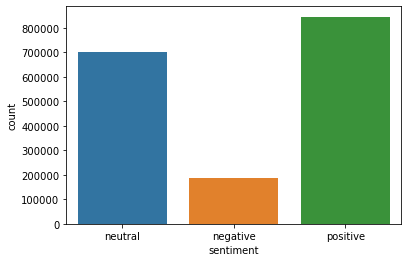

In [19]:
sns.countplot(x = dataset['sentiment'], data = dataset)

In [23]:
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re # 정규화

In [24]:
stemmer = SnowballStemmer('english')

In [25]:
stemmer

In [48]:
dataset.tail()

,user_name,user_description,user_followers,user_friends,user_favourites,date,text,hashtags,is_retweet,cleaned_tweets,subjectivity,polarity,sentiment
1734667,JomCRYPTO,Developer,5.0,41,394,2021-11-12 20:27:16,@WatcherGuru #Btc\n#ETH \n#LTC \n#COSMOS \n#St...,"['Btc', 'ETH', 'LTC', 'COSMOS', 'Stellar', 'Do...",False,Dogs,0.000000,0.000000,neutral
1734668,Ali,NaN,80.0,217,191,2021-11-12 20:27:15,@TheBitcoinConf @priceoftomorrow @addyinvest @...,"['shib', 'shiba', 'shiba_army', 'shibaw', 'shi...",False,Calm We go moon soon The new Shiba It x Unveil...,0.602273,0.218182,positive
1734669,Muhammed,NaN,34.0,81,3695,2021-11-12 20:27:08,@Heatherfernsby #pitbulltoken will be the doge...,"['pitbulltoken', 'pitbull', 'PitbullToken100x'...",False,dogecoin future huge investor base,0.675000,-0.133333,negative
1734670,Francesco Santoro $VET,"Investitore #BNB , #CRO e #VET appassionato d...",76.0,354,1011,2021-11-12 20:27:08,I am changing the way I invest. In the wallet ...,"['VET', 'btc', 'BNB']",False,I changing way I invest In wallet The rest fun...,0.000000,0.000000,neutral
1734671,GROND,Investor / Misantrophe / Fudie\n\nPyramid sche...,17.0,41,594,2021-11-12 20:27:05,@LucaLand97 It is absolutely unbelievable. And...,['BTC'],False,It absolutely unbelievable And price hardly re...,0.770833,-0.270833,negative


In [39]:
from sklearn.feature_extraction.text import CountVectorizer
### Convert a collection of text documents to a matrix of token counts
### sklearn의 feature_extraction의 text의 CountVectorizer

In [40]:
#디폴트 값으로 CountVectorizer를 만들어줍니다.
cv = CountVectorizer(max_features=1500)

In [42]:
cv.fit(dataset["cleaned_tweets"])

ValueError: np.nan is an invalid document, expected byte or unicode string.